In [6]:
import pandas_ta as ta
from lib.fetch_ohlc import fetch_ohlc
from tradingstrategy.chain import ChainId
from tradingstrategy.timebucket import TimeBucket

candles = fetch_ohlc(
    trading_pair=("WETH", "USDC"),
    chain_id=ChainId.ethereum,
    exchange_slug="uniswap-v3",
    timeframe=TimeBucket.h4,
)

Started Trading Strategy in Jupyter notebook environment, configuration is stored in /home/alpha/.tradingstrategy


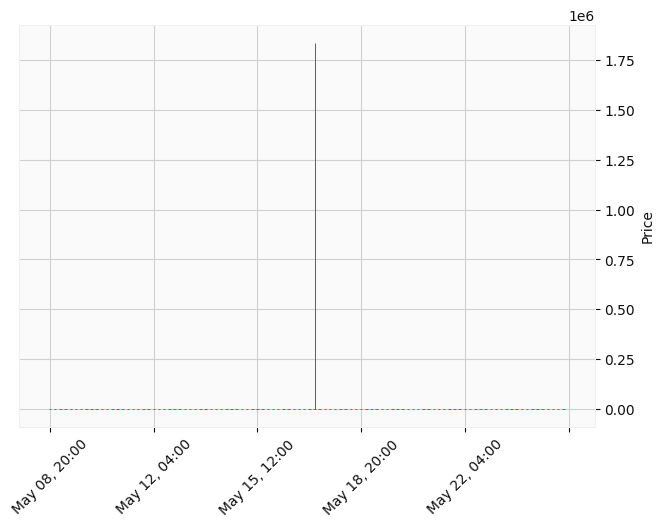

In [7]:
import mplfinance as mpf

df = candles[["open", "high", "low", "close", "volume"]]
df = df.iloc[-100:]
df.rename(
    {"open": "Open", "high": "High", "low": "Low", "close": "Close"},
    axis=1,
    inplace=True,
)

df.reset_index(inplace=True)
df.rename(columns={"timestamp": "Date"}, inplace=True)
df.set_index("Date", inplace=True)
mpf.plot(df, type="candle", volume=False, style="yahoo")

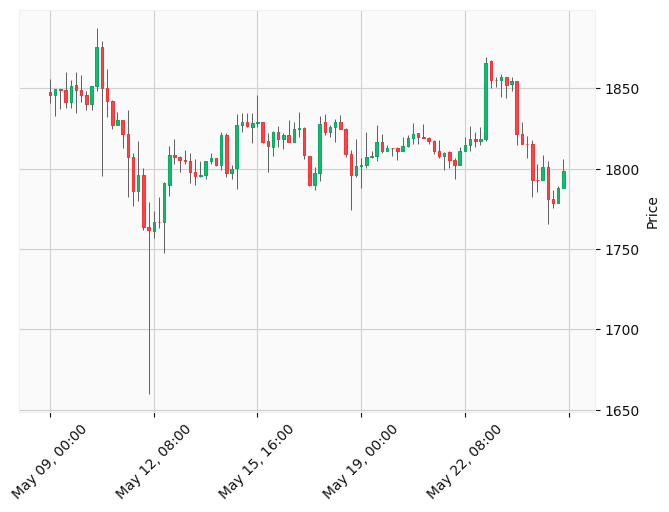

In [8]:
#### Same candle loaded from the website

import pandas as pd
import requests

# Set the URL and headers
url = "https://tradingstrategy.ai/api/candles?pair_id=2697765&exchange_type=uniswap_v3&time_bucket=4h"
# Perform the request
response = requests.get(url)

# Read the JSON data from the URL into a DataFrame
df = pd.read_json(response.text)

# Print the DataFrame
df.rename(
    {"o": "Open", "h": "High", "l": "Low", "c": "Close", "ts": "Date"},
    axis=1,
    inplace=True,
)
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%dT%H:%M:%S")
df.set_index("Date", inplace=True)
mpf.plot(df, type="candle", volume=False, style="yahoo")